<a href="https://colab.research.google.com/github/pavlyk/DataScience/blob/master/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%9A%D0%BE%D0%BD%D0%B4%D0%BE%D1%80%D1%81%D0%B5_(%D1%81_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Теорема Кондорсе

$$\large \sum\limits_{i=m}^M C^i_N p^i (1-p)^{N-i} $$

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np


def fac(n):
    if n == 0:
        return 1
    else:
        return n * fac(n-1)
  
def Cnk(n, k):
  return fac(n)/(fac((n-k))*fac(k))
  
def cond(p, M):  

  R = 0
  m = int((math.floor(M)/2)+1) # больше половины
  
  for i in range(m,M+1): # нас интересуют все ситуации когда больше половины проголосовали
    st = M-i
    pi = p**i
    p1 = (1-p)**st
    R = R + Cnk(M,i)*pi*p1
    print(M, i, Cnk(M,i), pi, p1)
    print(R)
       
  return R

cond(0.8,4)

# Мы точно знаем что все голосуют с вероятностью 0.8
# Определим вероятность что из 3 человек 2 проголосуют верно
# Кол-во перестановок 3 - хх0 х0х 0хх
# 0.64 вероятность того что оба они проголосуют верно 0.8*0.8
# 0.2 вероятность того что последний человек проголосуют не верно
# Получим 3*0.64*0.2 = 0.384
#___________________________
# xx0 - 0.8 * 0.8 * 0.2
# x0x - 0.8 * 0.2 * 0.8
# 0xx - 0.2 * 0.8 * 0.8
# расчитываем вероятность каждого из раскладов, а так как каждый их них нас устроит
# то складываем их
# 0.1280 * 3 = 0.384
#___________________________

# Определим вероятность что из 3 человек 3 проголосуют верно
# Кол-во перестановок 1 - ххх
# 0.512 вероятность того что оба они проголосуют верно 0.8*0.8*0.8
# 1.0 вероятность того что последний человек проголосуют не верно (неучитываем, его нет)
# Получим 1*0.512*1 = 0.512

# Складываем вероятности 0.384+0.512 = 0.896


4 3 4.0 0.5120000000000001 0.19999999999999996
0.4096
4 4 1.0 0.4096000000000001 1.0
0.8192000000000002


0.8192000000000002

In [8]:
0.8*0.2*0.8*3

0.3840000000000001

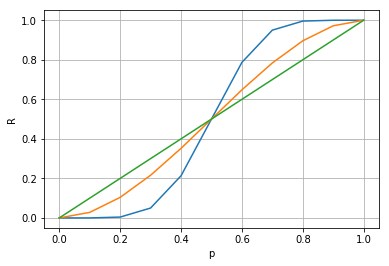

In [0]:

fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel('p')
ax.set_ylabel('R')

x = np.arange(0, 1.1, 0.1)
y1 = []

for xx in x:
#   print(xx)
  y1.append(cond(xx,15))
  
plt.plot(x, y1)

y2 = []
for xx in x:
  y2.append(cond(xx,3))
  
plt.plot(x, y2)

y3 = []
for xx in x:
  y3.append(cond(xx,1))
  
plt.plot(x, y3)

plt.show()

In [0]:
import pandas as pd
d = {"calls":np.array([1, 1, 2, 1, 2, 3, 4, 5, 2, 1]),"churn":np.array([0, 0, 0, 0, 0, 1, 1 ,1, 1, 0])}
df1 = pd.DataFrame(d)
df1

,calls,churn
0,1,0
1,1,0
2,2,0
3,1,0
4,2,0
5,3,1
6,4,1
7,5,1
8,2,1
9,1,0


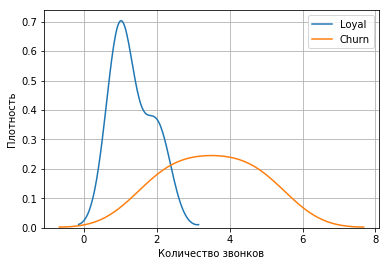

In [0]:
import seaborn as sns

fig = sns.kdeplot(df1[df1['churn'] == 0]['calls'], label = 'Loyal')
fig = sns.kdeplot(df1[df1['churn'] == 1]['calls'], label = 'Churn')        
fig.set(xlabel='Количество звонков', ylabel='Плотность')    
plt.grid()
plt.show()

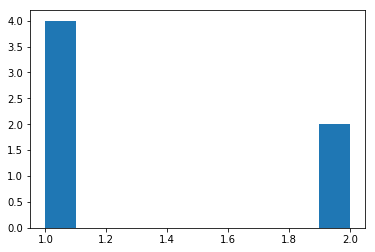

In [0]:
plt.hist(df1[df1['churn'] == 0]['calls'])
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from pathlib import Path
import pandas as pd
PATH_TO_DATA = Path('drive/My Drive/_ODS/data/')
telecom_data = pd.read_csv(PATH_TO_DATA / 'telecom_churn.csv')

In [0]:
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


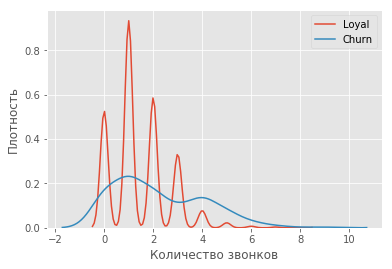

In [0]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
import numpy as np
%matplotlib inline

fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == False]['Customer service calls'], label = 'Loyal')
fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == True]['Customer service calls'], label = 'Churn')        
fig.set(xlabel='Количество звонков', ylabel='Плотность')    
plt.show()

In [0]:
loyal_calls = telecom_data[telecom_data['Churn'] == False]['Customer service calls'].values
loyal_calls.shape

(2850,)

In [0]:
np.random.randint(5, size=(3, 4)) # Сгенерировать выборку из чисел от 0 до 5 , размером 3 массива по 4 числа

array([[2, 4, 0, 3],
       [4, 2, 2, 2],
       [2, 2, 2, 0]])

In [0]:
np.random.randint(0, len(loyal_calls), (100, len(loyal_calls)))

array([[1253, 2791,  978, ..., 1155, 2545,  518],
       [ 135, 2101,  949, ..., 1404, 2162, 2778],
       [1612, 1203, 1442, ..., 1663, 1423, 2798],
       ...,
       [2239,   90, 1550, ..., 2141, 2469, 1735],
       [1584, 1466, 1168, ..., 1763,  640, 2222],
       [ 135, 1376,  713, ..., 2780, 1037, 2612]])

In [0]:
np.random.seed(0)

def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data))) # numpy.random.randint(low, high=None, size=None, dtype='l')
    samples = data[indices]
    return samples

[sample for sample in get_bootstrap_samples(loyal_calls, 1000)] # Создаем 1000 массивов из числе от 1 до len(data)

In [0]:
np.random.randint(0, len(loyal_calls), (100, len(loyal_calls))).shape

(100, 2850)

In [0]:
# Create a 2D Numpy Array like Matrix
matrixArr = np.array( [ [1, 2, 3],
                          [ 3, 2, 1] ])
# l = np.append(l,[[1, 2],[2, 1]],axis=0)
# l = np.append(l,[2,1],axis=0)
# print(matrixArr)
loyal_calls[matrixArr]

array([[1, 0, 2],
       [2, 0, 1]])

In [0]:
np.percentile([0,1,1,1,1,2,10,10,10,10,10],[10,90])

array([ 1., 10.])

In [0]:
[100 * 0.05 / 2., 100 * (1 - 0.05 / 2.)]

[2.5, 97.5]

In [0]:
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices] # Возвращает 100 массивов по массиву 2850 значений 
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# сохранение в отдельные numpy массивы данных по лояльным и уже бывшим клиентам
loyal_calls = telecom_data[telecom_data['Churn'] == False]['Customer service calls'].values
churn_calls= telecom_data[telecom_data['Churn'] == True]['Customer service calls'].values

# ставим seed для воспроизводимости результатов
np.random.seed(0)

# генерируем выборки с помощью бутстрэра и сразу считаем по каждой из них среднее
loyal_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(loyal_calls, 1000)] # формируем массив из 1000 средних
churn_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(churn_calls, 1000)]


#  выводим интервальную оценку среднего
print("Service calls from loyal:  mean interval",  stat_intervals(loyal_mean_scores, 0.05)) # Прецентиль от [2.5, 97.5]
print("Service calls from churn:  mean interval",  stat_intervals(churn_mean_scores, 0.05))

# В итоге мы получили, что с 95% вероятностью среднее число звонков от лояльных клиентов будет лежать в промежутке между 1.40 и 1.50

Service calls from loyal:  mean interval [1.4077193  1.49473684]
Service calls from churn:  mean interval [2.0621118  2.39761905]
